Deep Learning using Rectified Linear Units
===

## Overview

In this notebook, we explore the performance of a neural net with varying activation functions on an image classification task.

We load our dependencies.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from neural_net import NeuralNet, loss_fn, train_step, train

We set up the GPU memory growth.

In [2]:
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

We set the random seeds for reproducibility.

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

We set the batch size, the number of epochs, and the number of units per layer.

In [4]:
batch_size = 256
epochs = 300
neurons = [512, 512]

## Data Preparation

We load the Fashion-MNIST dataset.

In [5]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

We scale the images.

In [6]:
train_features = train_features.astype('float32').reshape(-1, 784) / 255.
test_features = test_features.astype('float32').reshape(-1, 784) / 255.

We one-hot encode labels.

In [7]:
train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)

We create a `tf.data.Dataset` object for the training dataset.

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
dataset = dataset.prefetch(4096).shuffle(4096).batch(batch_size, True)

## Model

We use a `NeuralNet` class that consists of two hidden layers.

### Logistic-based Model

We define a 2-layer NN with Logistic activation function.

In [13]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.sigmoid,
    initializer='glorot_uniform',
    num_classes=10
)

We train our model for 300 epochs.

In [14]:
logistic_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 226.85069274902344, mean accuracy = 0.7026742696762085
epoch 100/300 : mean loss = 165.6378936767578, mean accuracy = 0.7480635643005371
epoch 150/300 : mean loss = 145.91976928710938, mean accuracy = 0.7715010643005371
epoch 200/300 : mean loss = 134.63414001464844, mean accuracy = 0.7908653616905212
epoch 250/300 : mean loss = 126.2082290649414, mean accuracy = 0.8069410920143127
epoch 300/300 : mean loss = 120.0928955078125, mean accuracy = 0.8179420232772827


We produce predictions for the test data.

In [15]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [16]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [17]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.8077999949455261


### TanH-based Model

We define a 2-layer NN with Hyperbolic Tangent activation function.

In [18]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.tanh,
    initializer='glorot_uniform',
    num_classes=10
)

We train our model for 300 epochs.

In [19]:
tanh_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 105.21068572998047, mean accuracy = 0.8401609063148499
epoch 100/300 : mean loss = 93.50444030761719, mean accuracy = 0.8586404919624329
epoch 150/300 : mean loss = 87.16844177246094, mean accuracy = 0.8679720759391785
epoch 200/300 : mean loss = 82.38009643554688, mean accuracy = 0.8752003312110901
epoch 250/300 : mean loss = 78.46544647216797, mean accuracy = 0.8814770579338074
epoch 300/300 : mean loss = 75.18775939941406, mean accuracy = 0.8855168223381042


We produce predictions for the test data.

In [20]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [21]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [22]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.8673999905586243


### ReLU-based Model

We define a 2-layer NN with ReLU activation function.

In [23]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.relu,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [24]:
relu_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 102.61029052734375, mean accuracy = 0.8464877009391785
epoch 100/300 : mean loss = 88.52607727050781, mean accuracy = 0.8682057857513428
epoch 150/300 : mean loss = 80.51087951660156, mean accuracy = 0.8793736696243286
epoch 200/300 : mean loss = 74.67703247070312, mean accuracy = 0.8882378339767456
epoch 250/300 : mean loss = 69.75143432617188, mean accuracy = 0.8951489329338074
epoch 300/300 : mean loss = 65.5818862915039, mean accuracy = 0.9007745981216431


We produce predictions for the test data.

In [25]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [26]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [27]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.8784999847412109


### Leaky ReLU-based Model

We define a 2-layer NN with Leaky ReLU activation function.

In [28]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.leaky_relu,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [29]:
lrelu_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 103.75188446044922, mean accuracy = 0.8468549847602844
epoch 100/300 : mean loss = 89.8017578125, mean accuracy = 0.8675881624221802
epoch 150/300 : mean loss = 82.1623764038086, mean accuracy = 0.8779380321502686
epoch 200/300 : mean loss = 76.46849822998047, mean accuracy = 0.8851161599159241
epoch 250/300 : mean loss = 71.71730041503906, mean accuracy = 0.8919270634651184
epoch 300/300 : mean loss = 67.99357604980469, mean accuracy = 0.8984708786010742


We produce predictions for the test data.

In [30]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [31]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [32]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.8727999925613403


### Softplus-based Model

We define a 2-layer NN with Softplus activation function.

In [33]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.softplus,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [34]:
softplus_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 115.14720916748047, mean accuracy = 0.8280749320983887
epoch 100/300 : mean loss = 102.64752197265625, mean accuracy = 0.8472722768783569
epoch 150/300 : mean loss = 96.05299377441406, mean accuracy = 0.8574719429016113
epoch 200/300 : mean loss = 91.90483093261719, mean accuracy = 0.8627971410751343
epoch 250/300 : mean loss = 88.32999420166016, mean accuracy = 0.8678051829338074
epoch 300/300 : mean loss = 84.96981811523438, mean accuracy = 0.8728298544883728


We produce predictions for the test data.

In [35]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [36]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [37]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.8539999723434448


### ELU-based Model

We define a 2-layer NN with ELU activation function.

In [38]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.elu,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [39]:
elu_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 102.26019287109375, mean accuracy = 0.8457198143005371
epoch 100/300 : mean loss = 90.5494384765625, mean accuracy = 0.8645833134651184
epoch 150/300 : mean loss = 84.00231170654297, mean accuracy = 0.8729801177978516
epoch 200/300 : mean loss = 79.03978729248047, mean accuracy = 0.8805589079856873
epoch 250/300 : mean loss = 75.30903625488281, mean accuracy = 0.88671875
epoch 300/300 : mean loss = 72.02068328857422, mean accuracy = 0.8911091089248657


We produce predictions for the test data.

In [40]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [41]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [42]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.8687000274658203


## Training Performance

We lay down the training performance of each model.

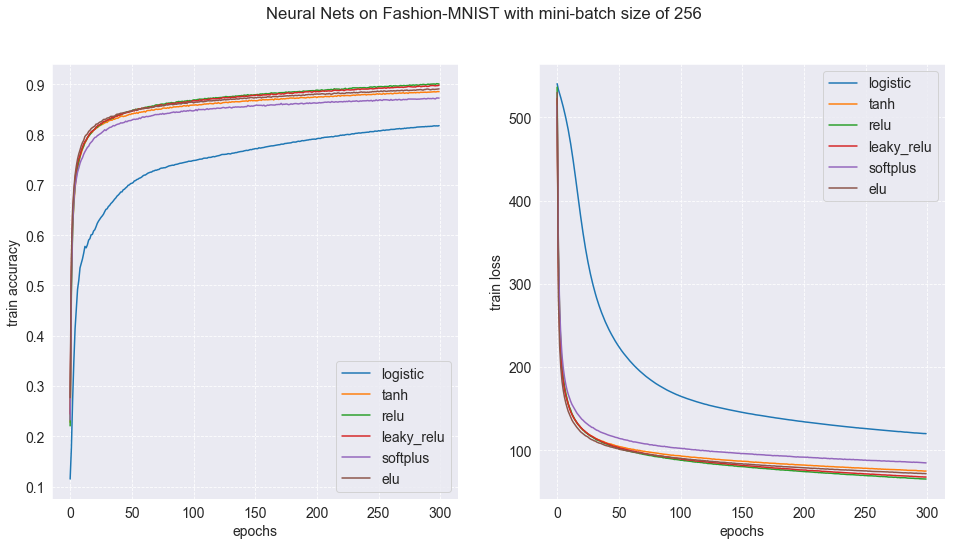

In [43]:
sns.set_style('dark', {'grid.linestyle': '--'})
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})

plt.subplot(121)
plt.plot(range(len(logistic_performance[0])), logistic_performance[0], label='logistic')
plt.plot(range(len(tanh_performance[0])), tanh_performance[0], label='tanh')
plt.plot(range(len(relu_performance[0])), relu_performance[0], label='relu')
plt.plot(range(len(lrelu_performance[0])), lrelu_performance[0], label='leaky_relu')
plt.plot(range(len(softplus_performance[0])), softplus_performance[0], label='softplus')
plt.plot(range(len(elu_performance[0])), elu_performance[0], label='elu')
plt.xlabel('epochs')
plt.ylabel('train accuracy')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(122)
plt.plot(range(len(logistic_performance[1])), logistic_performance[1], label='logistic')
plt.plot(range(len(tanh_performance[1])), tanh_performance[1], label='tanh')
plt.plot(range(len(relu_performance[1])), relu_performance[1], label='relu')
plt.plot(range(len(lrelu_performance[1])), lrelu_performance[1], label='leaky_relu')
plt.plot(range(len(softplus_performance[1])), softplus_performance[1], label='softplus')
plt.plot(range(len(elu_performance[1])), elu_performance[1], label='elu')
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.legend(loc='upper right')
plt.grid()

plt.suptitle('Neural Nets on Fashion-MNIST with mini-batch size of 256')
plt.savefig('fmnist_experiments_256.png', dpi=300)
plt.show()